# Gaussian Source Kernel

Here we attempt to solve the viscous wave equation with a gaussian source term. Specifically, we are attempting to solve the following equation. 

$$\Delta \left(p -\frac{1}{w_0} p_{t} \right) - \frac{1}{c^2}p_{tt} = -\frac{K}{c^2} \varepsilon_{tt}$$

We take the fourier transform and yadi, yadi, yada, we are plotting the output.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import scipy.special as special
from scipy.special import jv as jv
import cmath

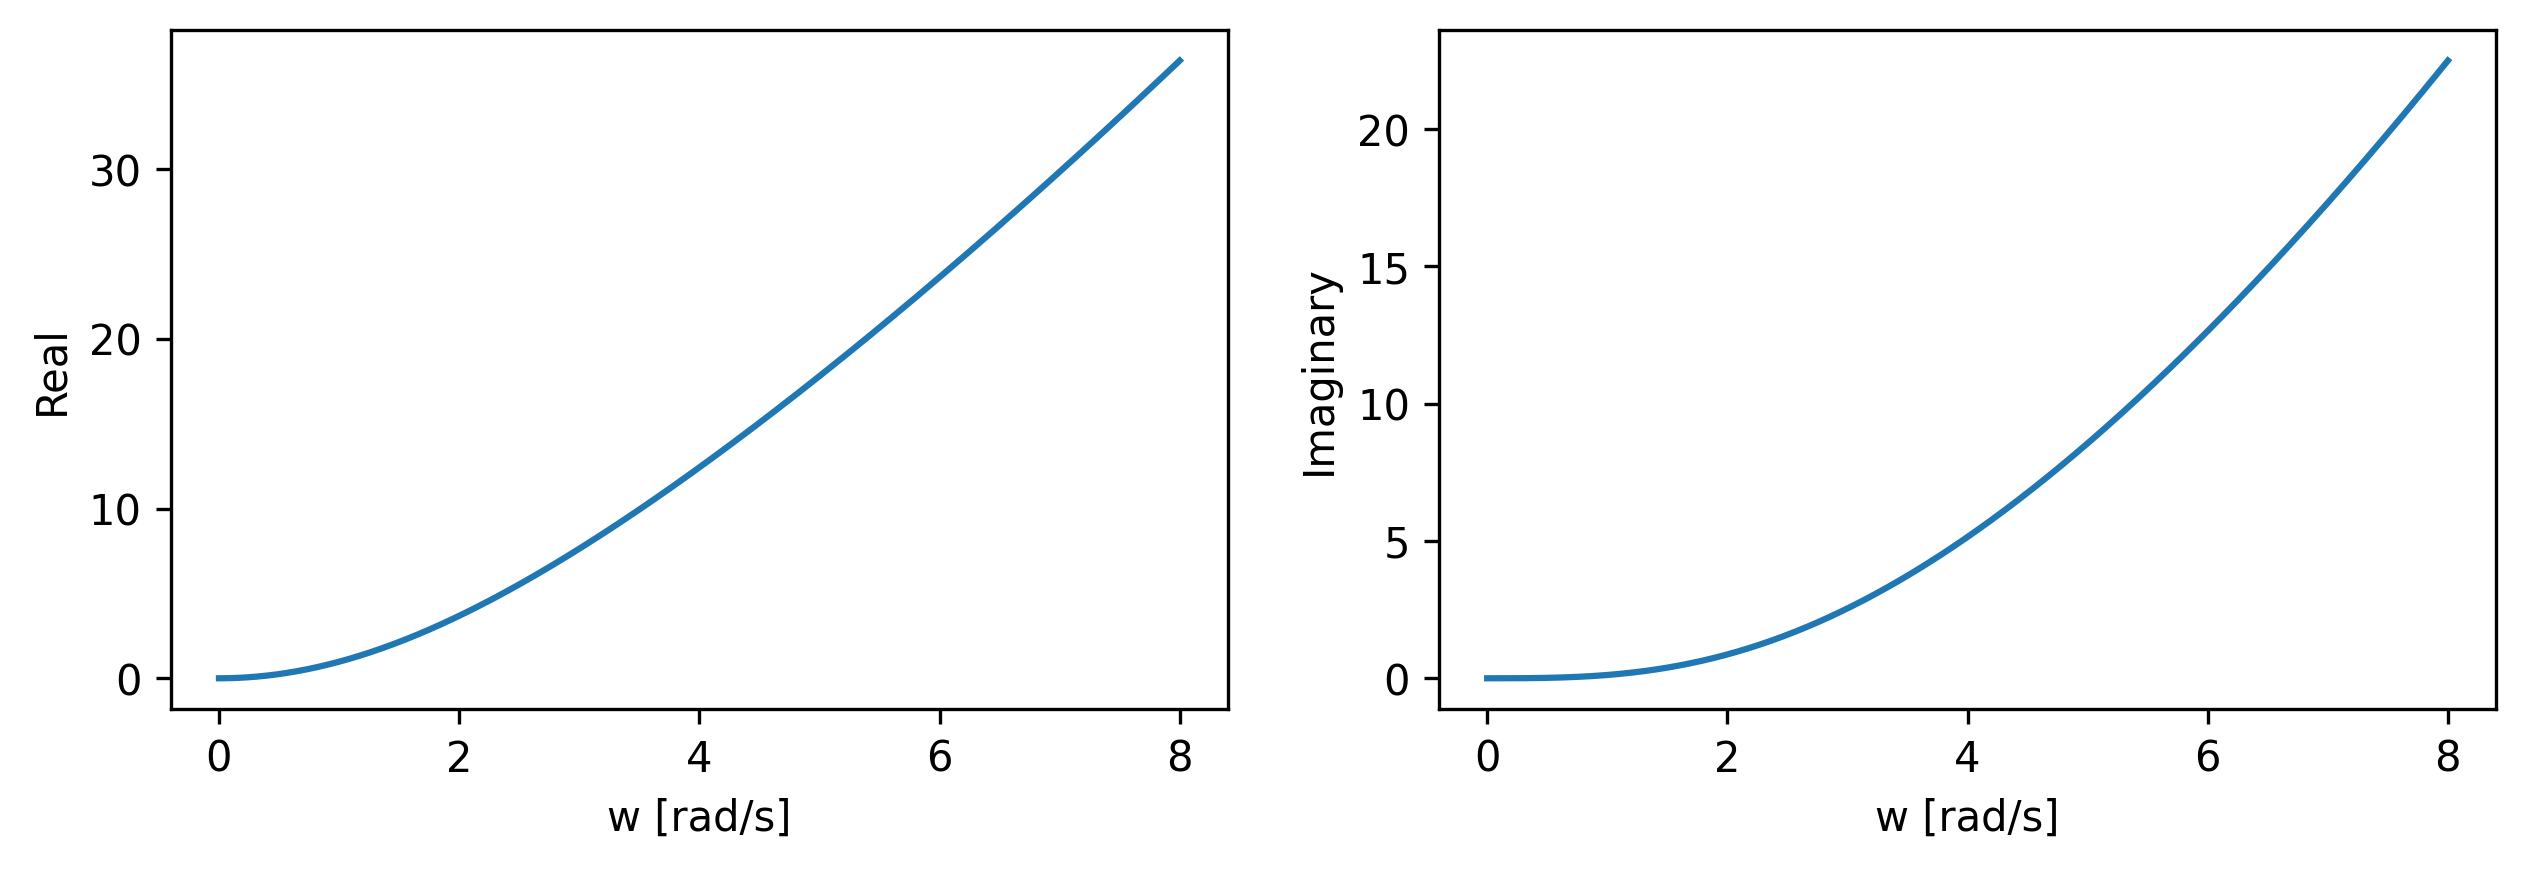

In [3]:
# Some constants
Npts = 1000
c  = 1
w0 = 4

# First define the dispersion relation
k = lambda w: w**2/c**2 /(1-1j *w/w0)**0.5
w = np.linspace(1e-10,2*w0,Npts)


# Create the figure
fig = plt.figure(figsize=(10,3),dpi=300)
RE = fig.add_subplot(121)
IM = fig.add_subplot(122)

# Set up the real plot
RE.set_xlabel('w [rad/s]')
RE.set_ylabel('Real')
RE.plot(w,k(w).real)


# Setup the imaginary polot
IM.set_xlabel('w [rad/s]')
IM.set_ylabel('Imaginary')
IM.plot(w,k(w).imag)

Text(0.5, 0, 'Frequency [w]')

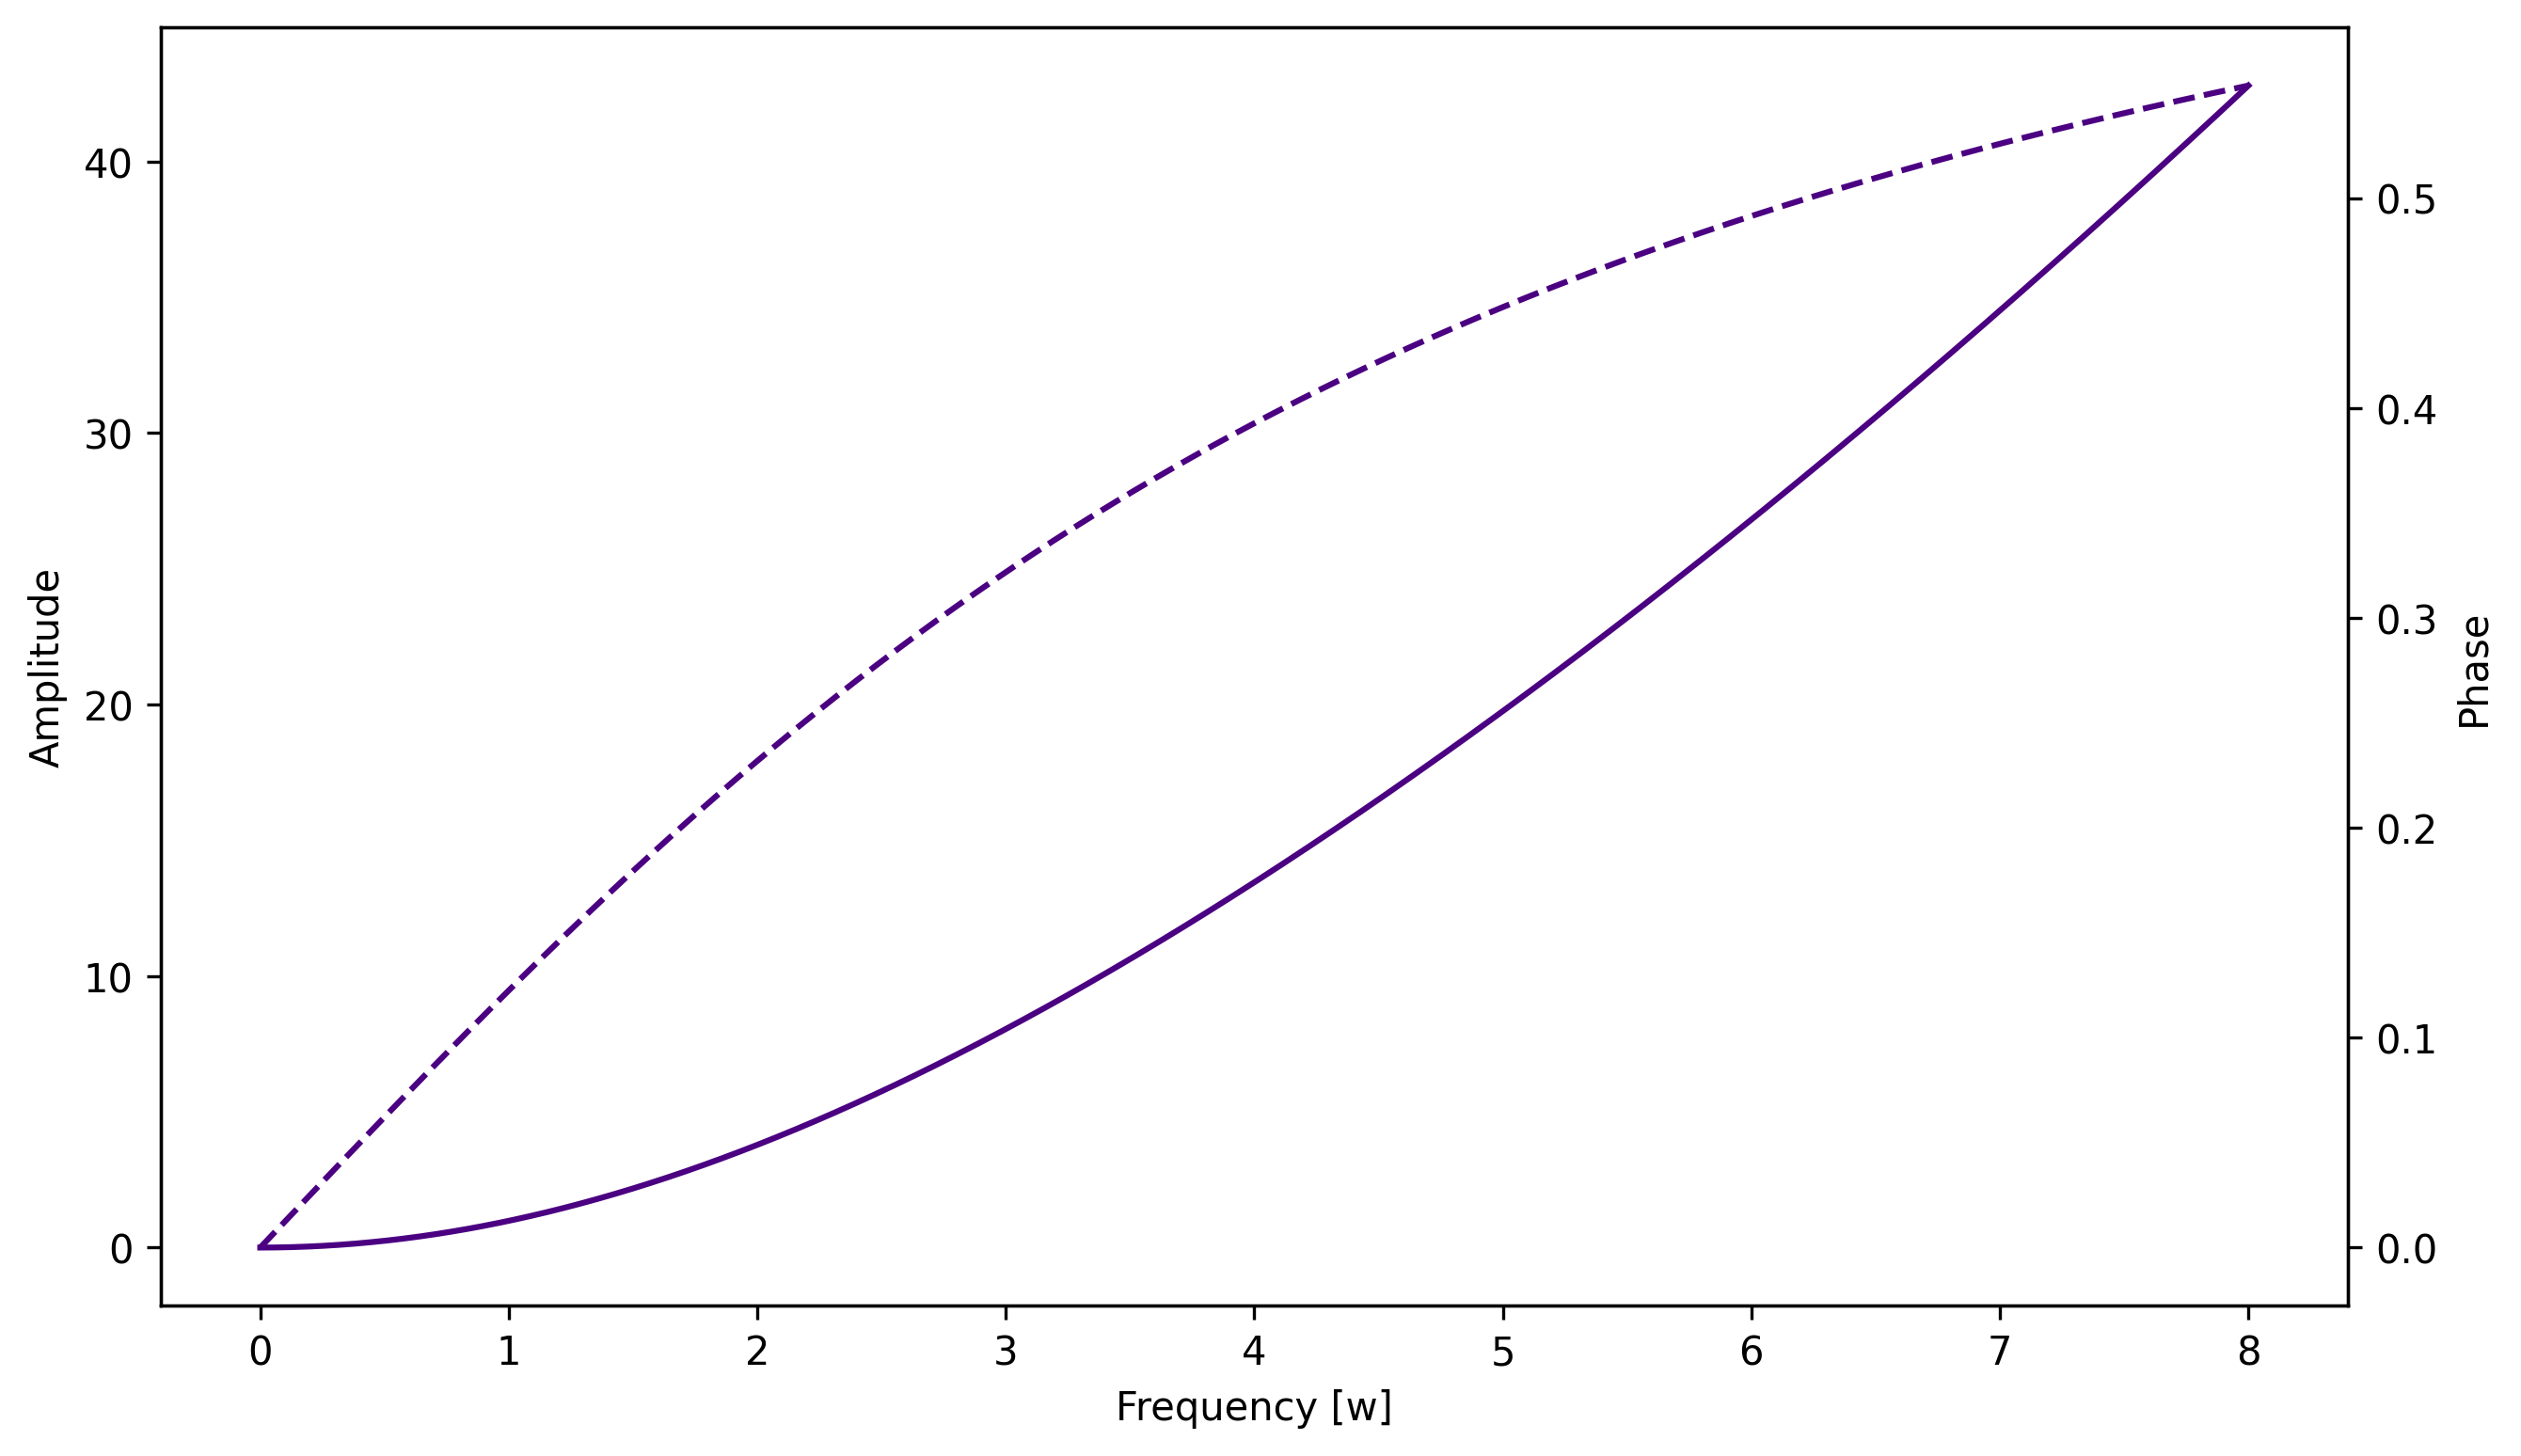

In [4]:
# We can also plot the phase angle and amplitude, which is probably better

# Setup the plot
fig = plt.figure(figsize=(10,6),dpi=300)
amp = fig.add_subplot(111)
phs = amp.twinx()

amp.plot(w,abs(k(w)),ls='-',label='Amplitude',c='indigo')
phs.plot(w,[cmath.phase(k(W)) for W in w],ls='--',label='Phase',c='indigo')

amp.set_ylabel('Amplitude')
phs.set_ylabel('Phase')
amp.set_xlabel('Frequency [w]')

## Fourier Transform

Now the fourier transform in time of the green's function for this problem is plotted here.

Text(0.5, 0, 'Radius [w]')

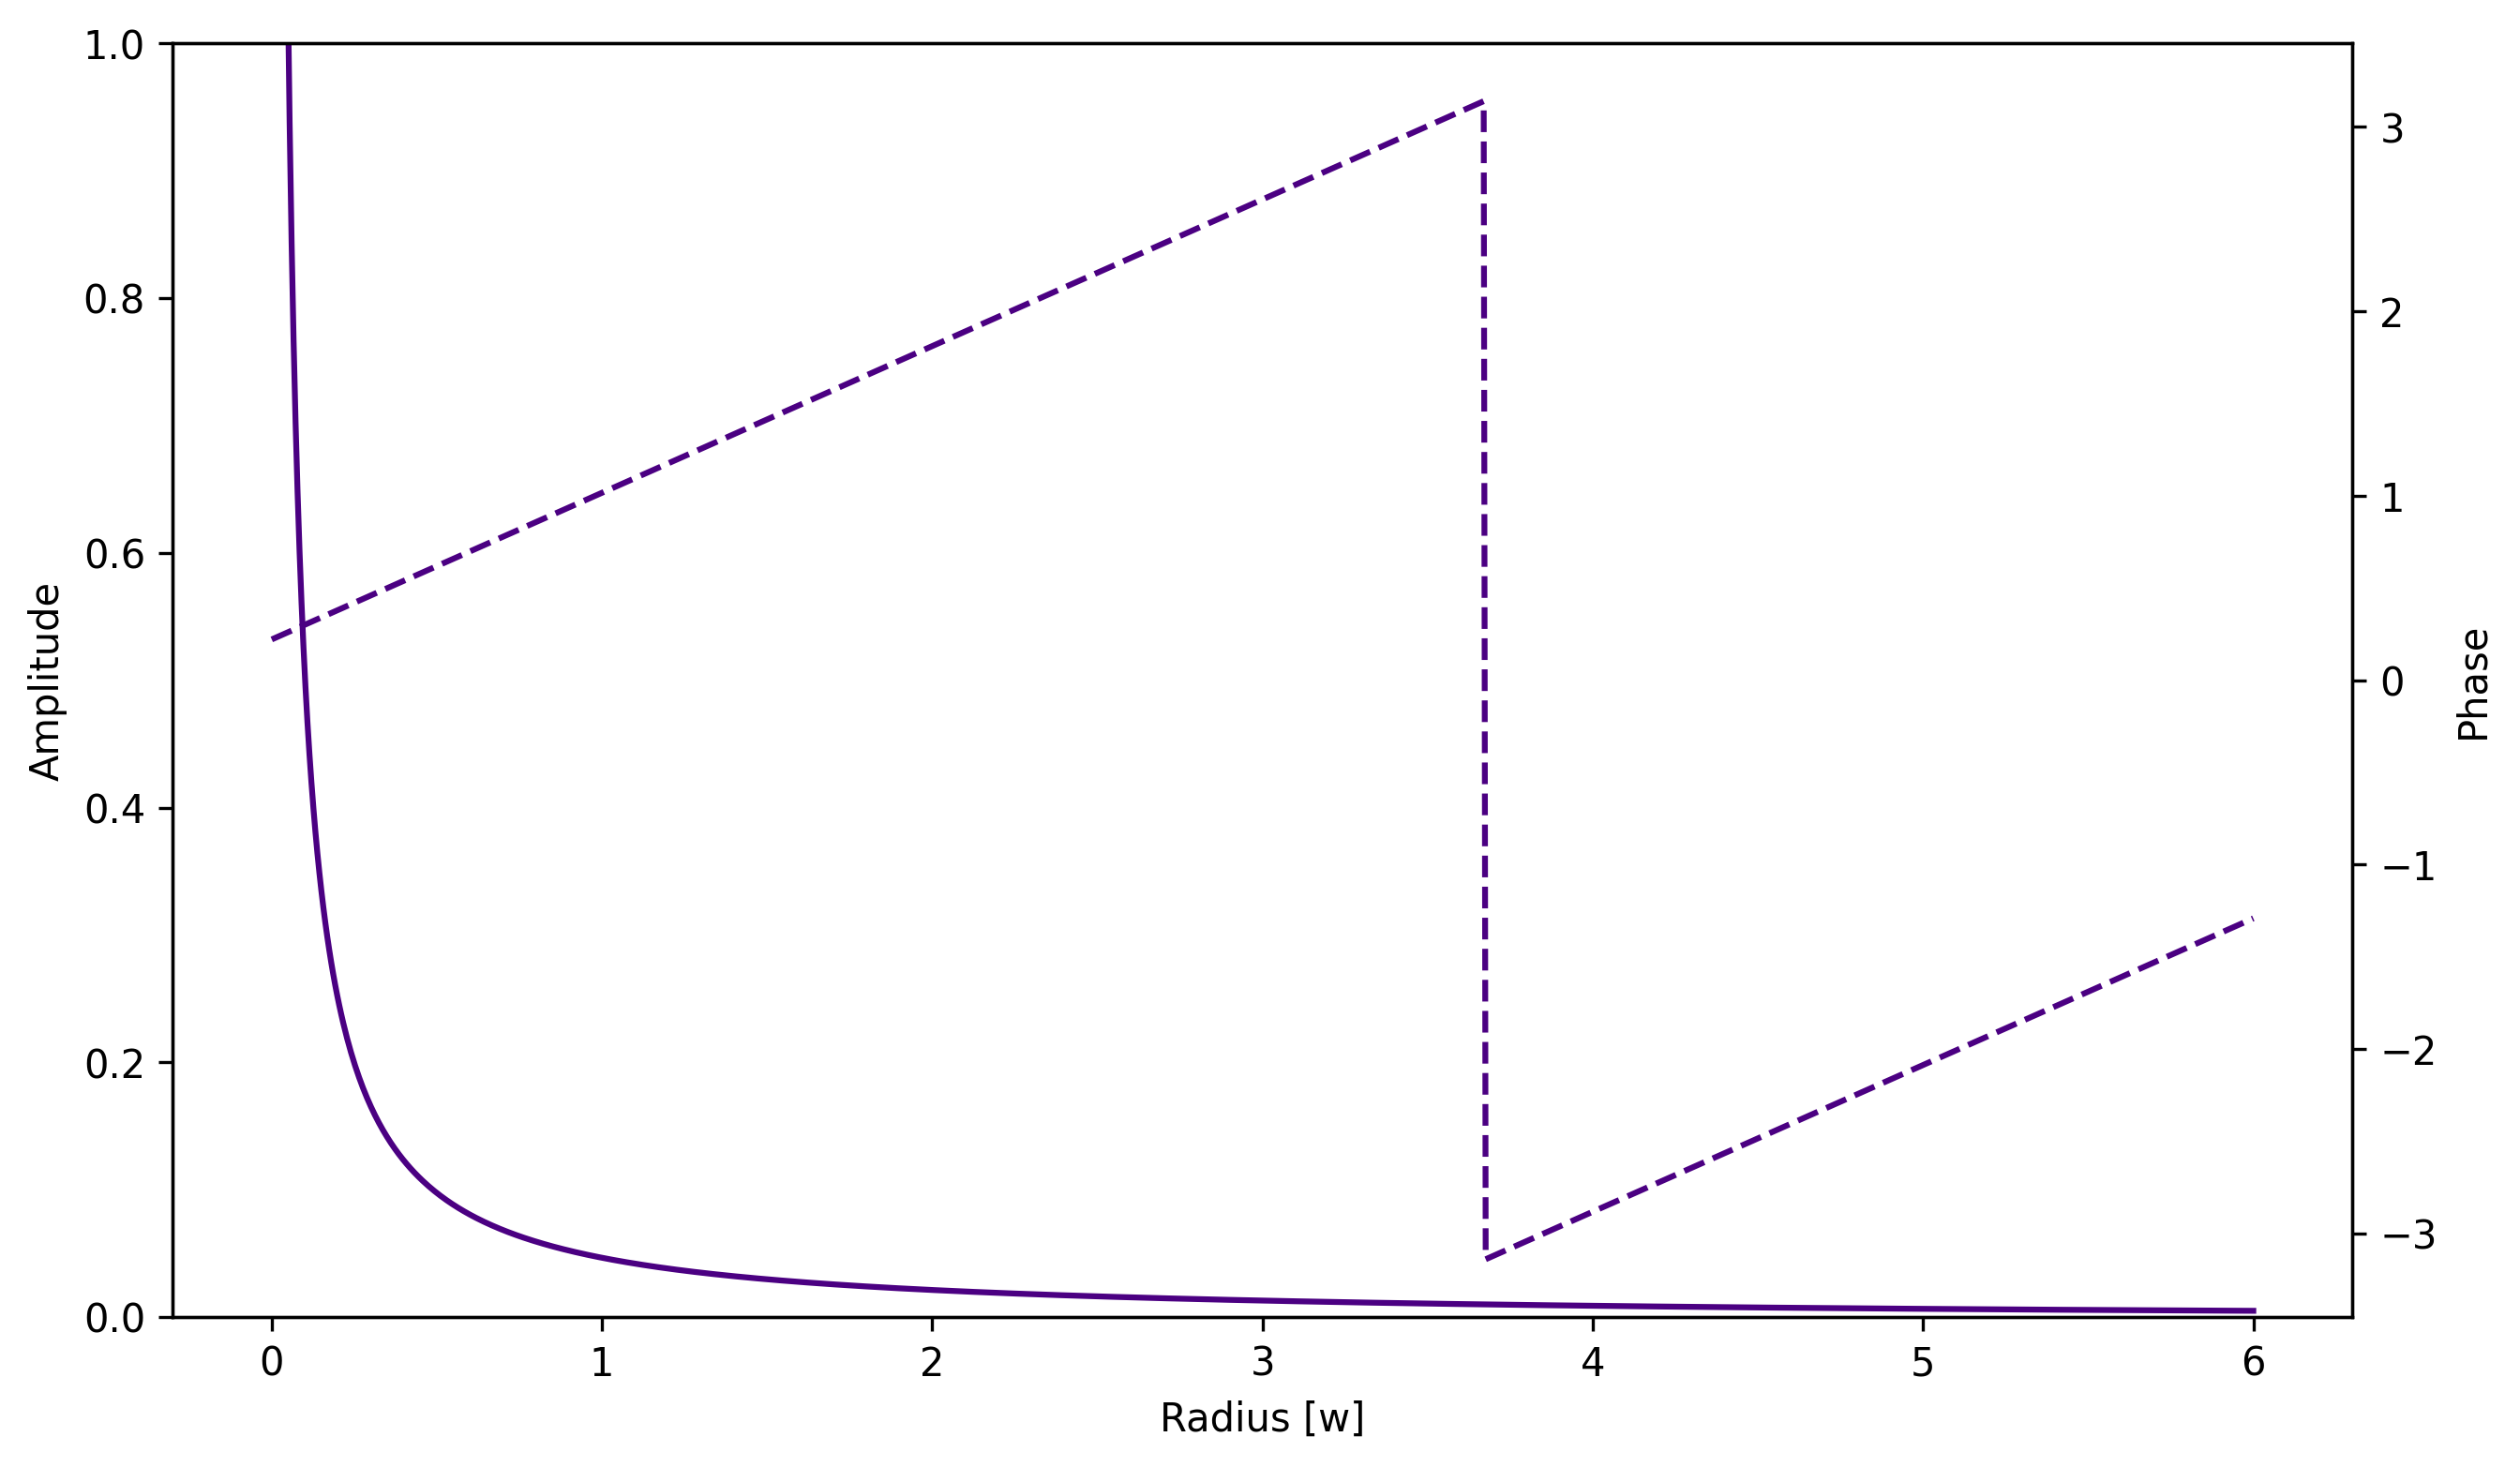

In [5]:
# define the fourier transform
F = lambda r,w: k(w)**2 * np.exp(1j*k(w)*r)/(4*np.pi*r)
r = np.linspace(1e-10,6,Npts)
wp= 0.9
rp = 1

# Setup the plot
fig = plt.figure(figsize=(10,6),dpi=300)
amp = fig.add_subplot(111)
phs = amp.twinx()

amp.plot(r,abs(F(r,wp)),ls='-',label='Amplitude',c='indigo')
phs.plot(r,[cmath.phase(F(R,wp)) for R in r],ls='--',label='Phase',c='indigo')

amp.set_ylabel('Amplitude')
amp.set_ylim(0,1)
phs.set_ylabel('Phase')
amp.set_xlabel('Radius [w]')

(0.0, 1.0)

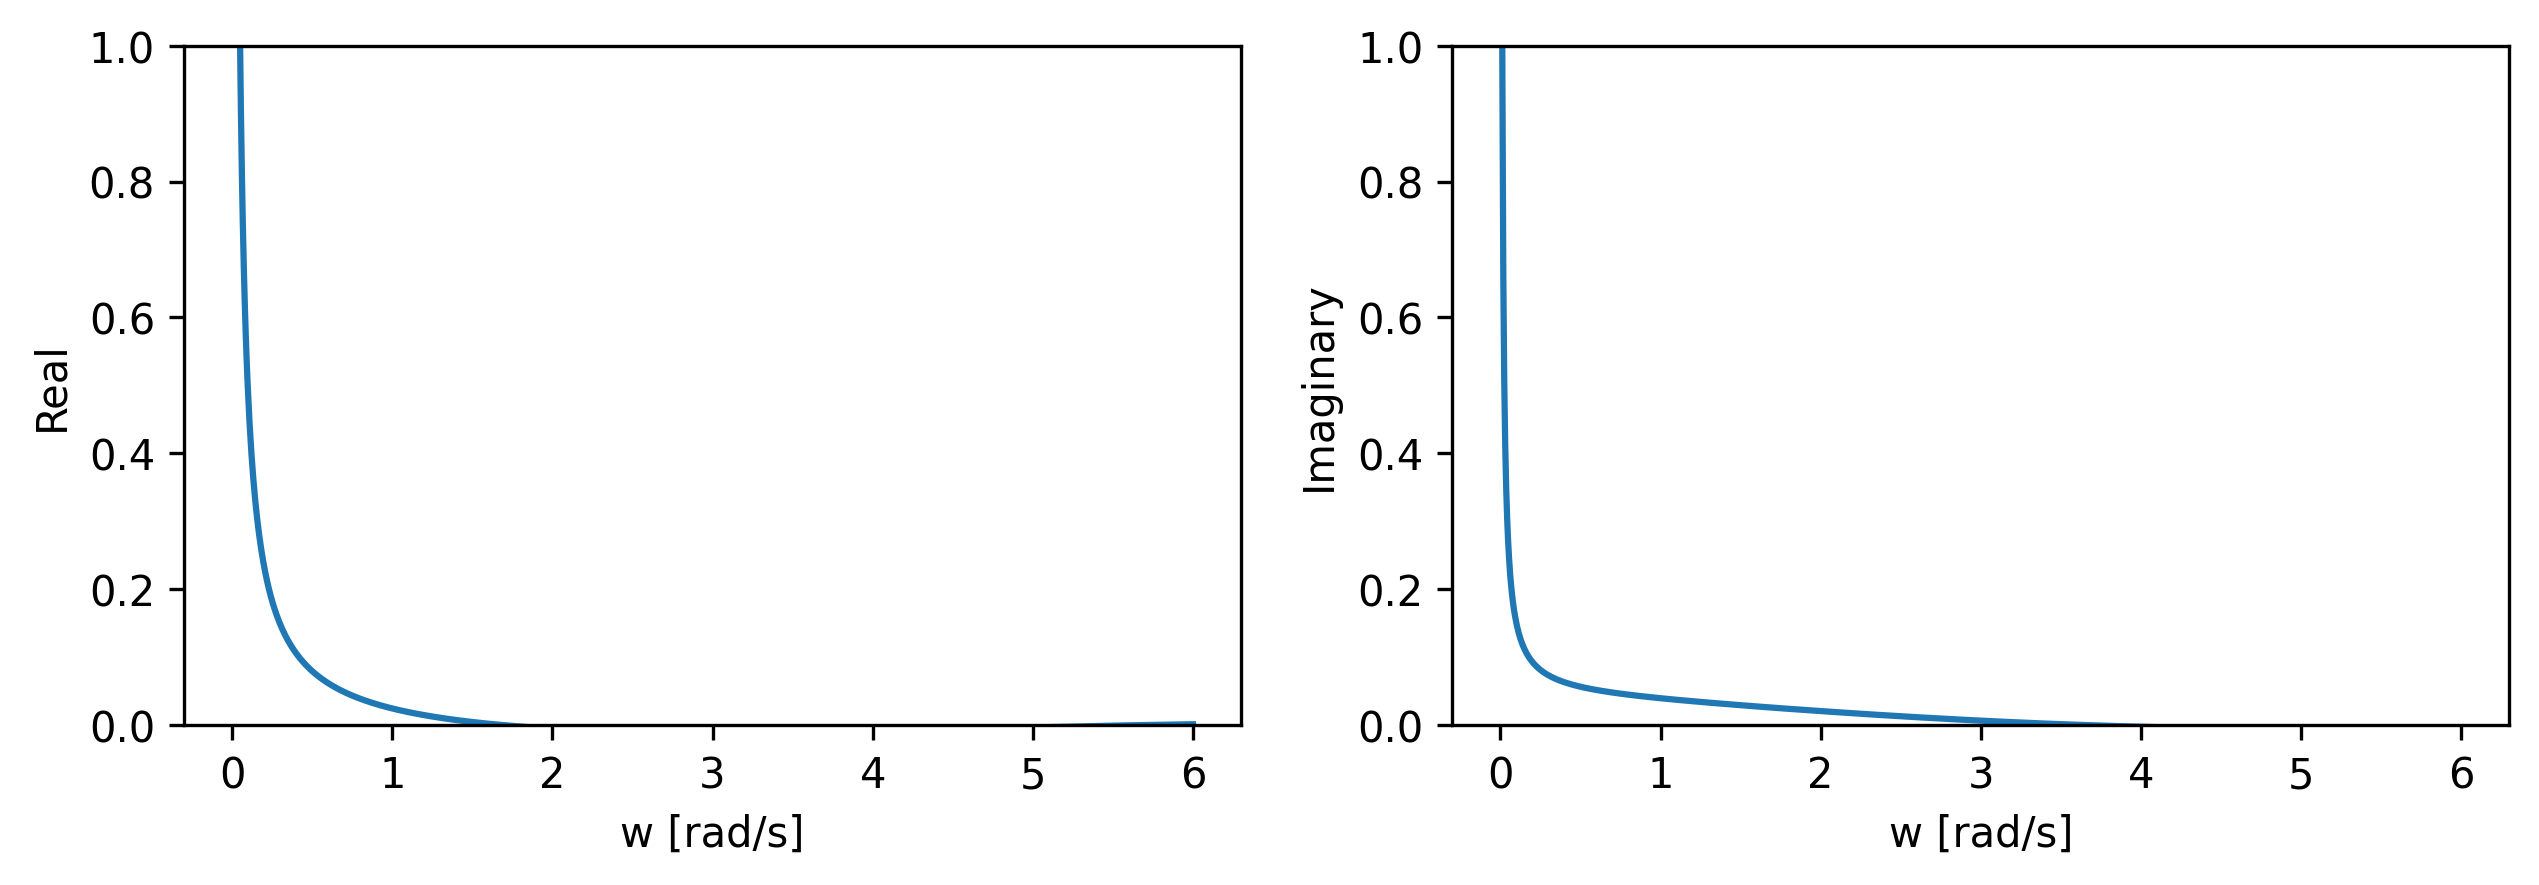

In [6]:
# Create the figure
fig = plt.figure(figsize=(10,3),dpi=300)
RE = fig.add_subplot(121)
IM = fig.add_subplot(122)

# Set up the real plot
RE.set_xlabel('w [rad/s]')
RE.set_ylabel('Real')
RE.plot(r,F(r,wp).real)
RE.set_ylim(0,1)


# Setup the imaginary polot
IM.set_xlabel('w [rad/s]')
IM.set_ylabel('Imaginary')
IM.plot(r,F(r,wp).imag)
IM.set_ylim(0,1)

Text(0.5, 0, 'Frequency [w]')

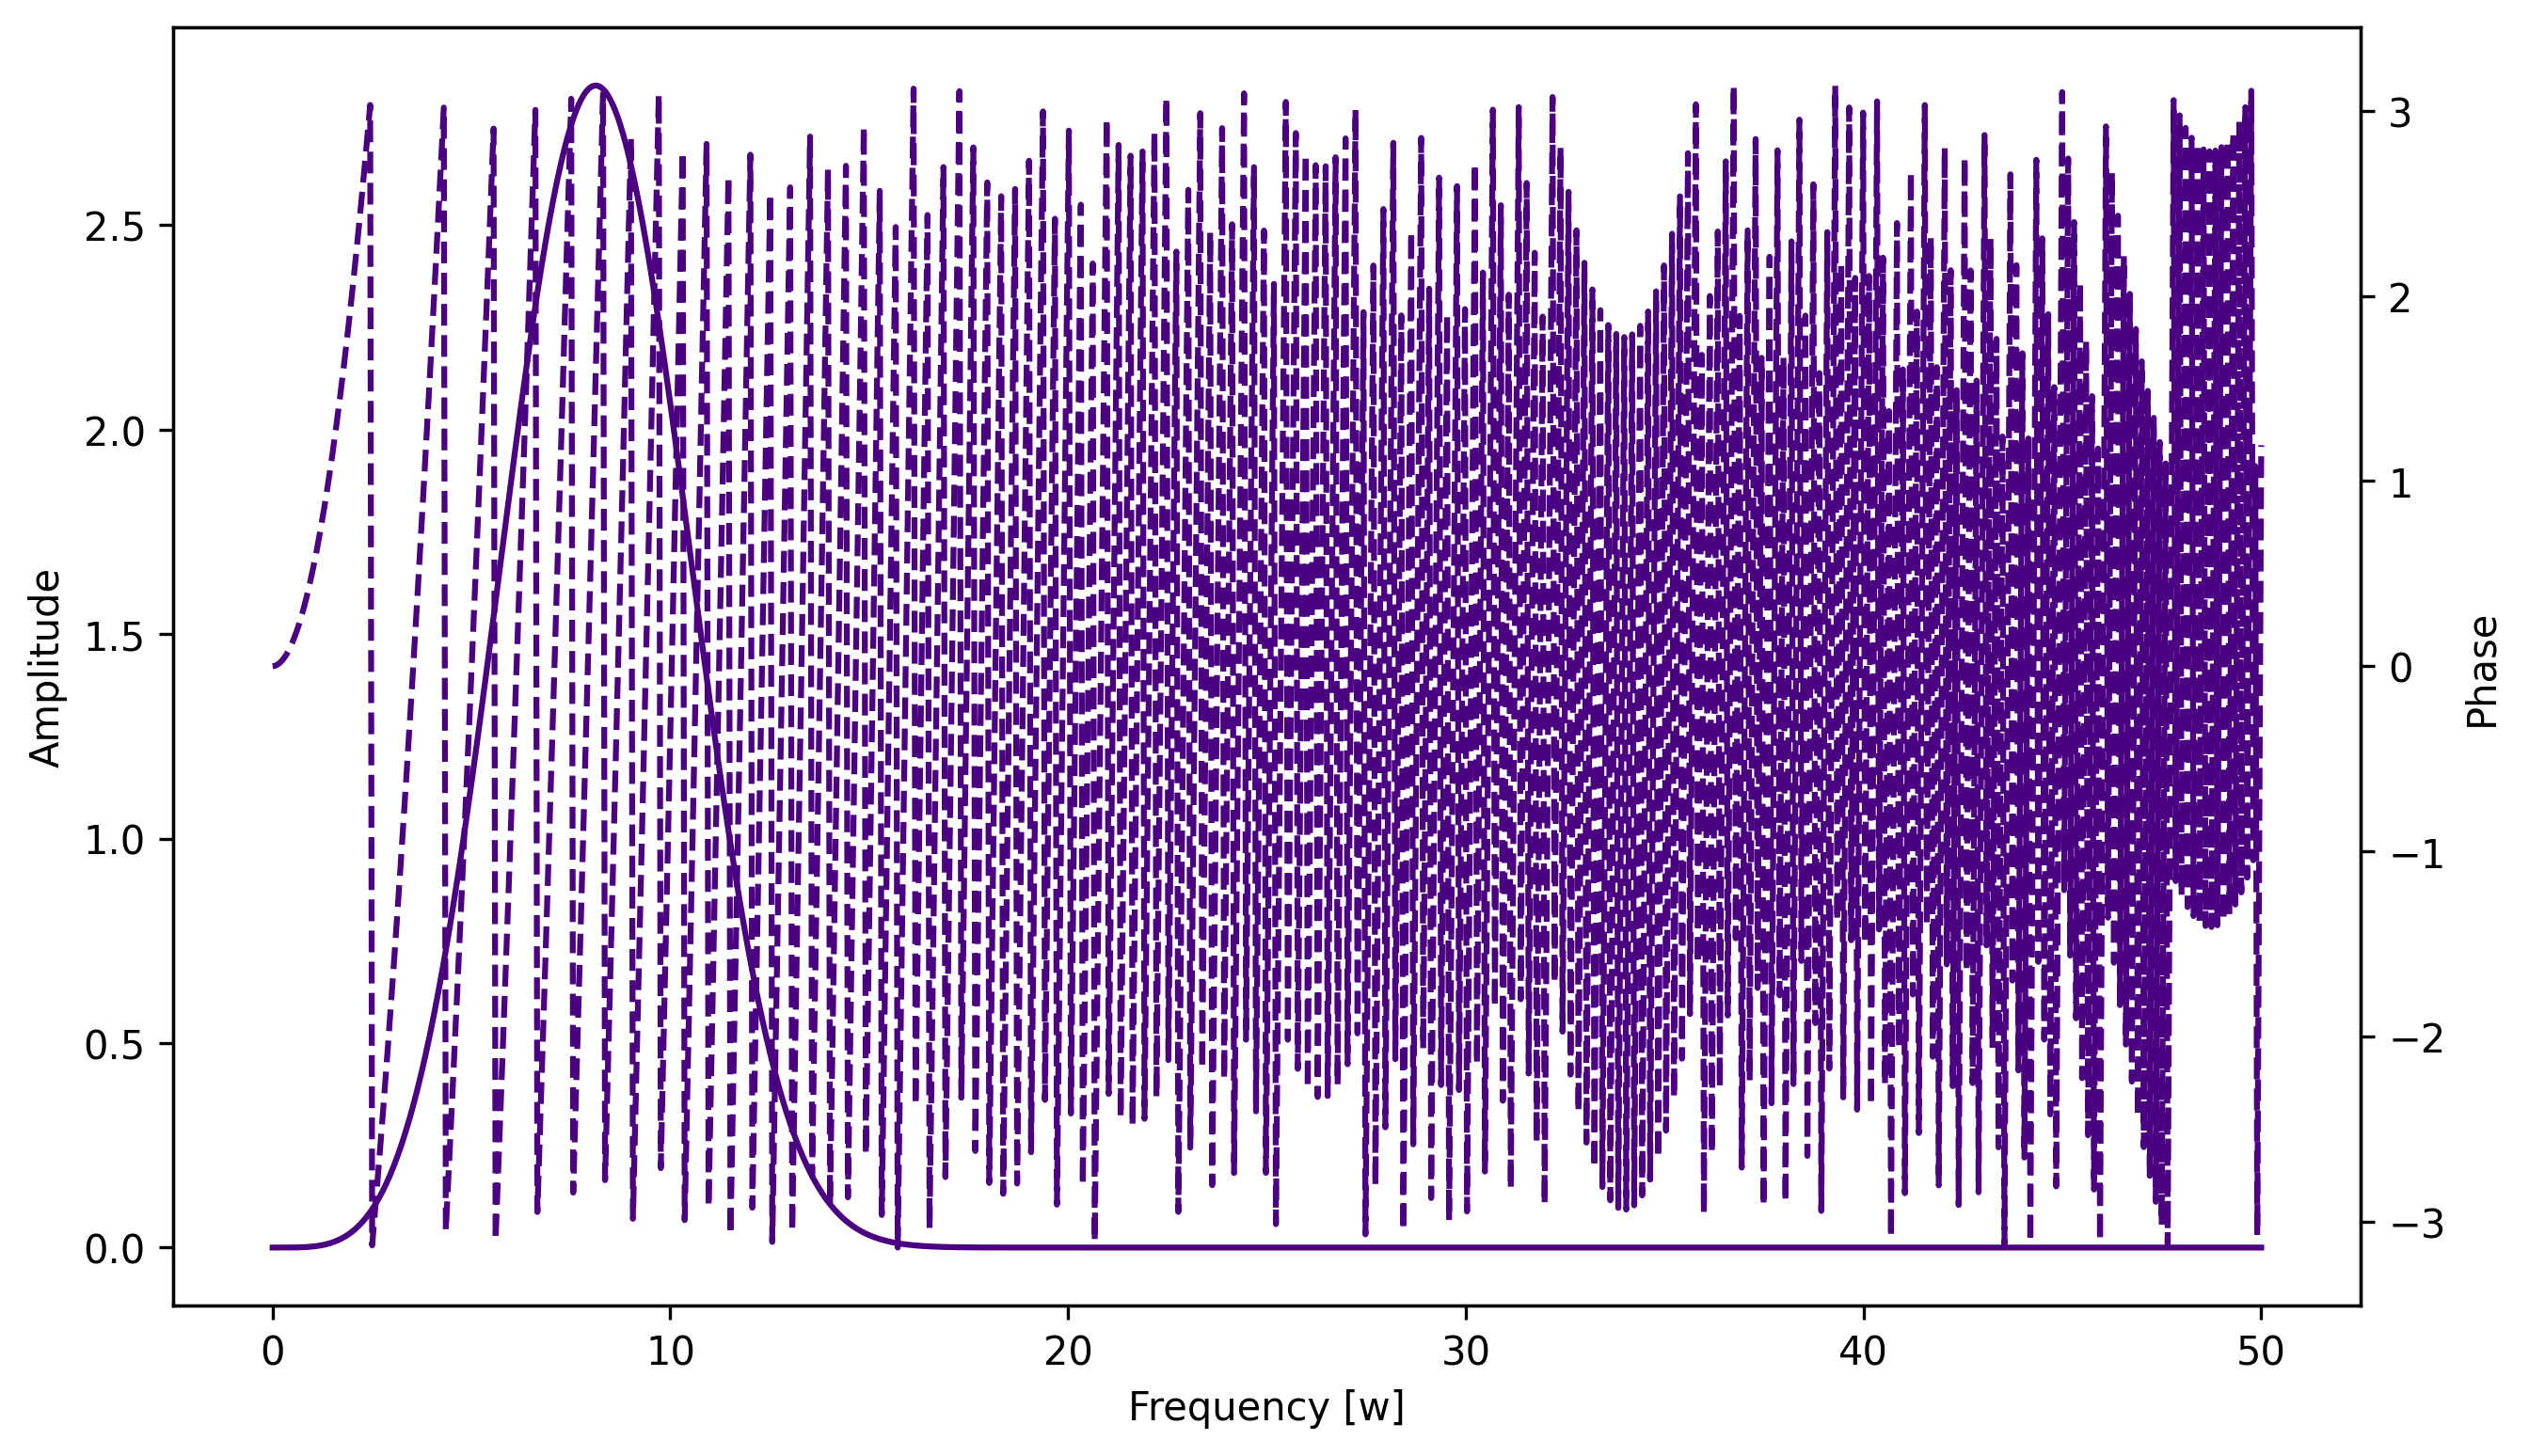

In [10]:
# define the fourier transform and approximation
kk = lambda w: w/c * (1+1j * w/w0)
FF = lambda r,w: kk(w)**2 * np.exp(1j*kk(w)*r)/(4*np.pi*r) 
F  = lambda r,w: k(w)**2  * np.exp(1j*k(w)*r) /(4*np.pi*r)
r  = np.linspace(1e-10,6,Npts)
w  = np.linspace(1e-10,50,Npts)
wp = 1
rp = 2
c  = 2
w0 = 100

# Setup the plot
fig = plt.figure(figsize=(10,6),dpi=300)
amp = fig.add_subplot(111)
phs = amp.twinx()

amp.plot(w,abs(F(rp,w)),ls='-',label='Amplitude',c='indigo')
# amp.plot(w,abs(FF(rp,w)),ls='-',label='Amplitude approx',c='darkblue')
phs.plot(w,[cmath.phase(F(rp,W)) for W in w],ls='--',label='Phase',c='indigo')
# phs.plot(w,[cmath.phase(FF(rp,W)) for W in w],ls='--',label='Phase approx',c='darkblue')

amp.set_ylabel('Amplitude')
# amp.set_ylim(0,1)
phs.set_ylabel('Phase')
amp.set_xlabel('Frequency [w]')

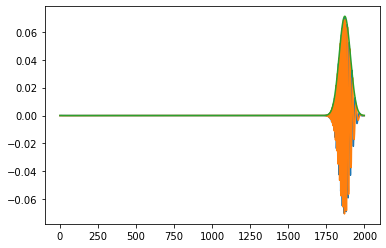

In [11]:
import numpy.fft as fft

X = F(rp,w)
X = np.append(X,[0]*len(X),axis=0)

Y = fft.ifft(X)

plt.plot(Y.real)
plt.plot(Y.imag)
plt.plot(abs(Y))
# plt.xlim(1980,2000)

In [107]:
# Now consider the solution for the thingy that we have already found using bessel functions

def f1(r,t,order = 100):
    S = 0
    a = w0* r/c
    b = w0*t
    for i in range(order):
        S+= b**i/np.math.factorial(i) * jv(-2*i,2*a)
    
    return S

def f2(r,t,order = 100):
    S = 0
    a = w0 * r/c
    b = w0 * t
    for i in range(order):
        S+= b**i/np.math.factorial(i) * jv(-2*i - 2,2*a)
    
    return S

def f3(r,t,order = 100):
    S = 0
    a = w0 * r/c
    b = w0 * t
    for i in range(order):
        S+= b**i/np.math.factorial(i) * jv(-2*i - 4,2*a)
    
    return S


def f(r,t,order=100):
    return (f1(r,t,order) + f3(r,t,order) - 2 * f2(r,t,order))* np.exp(-w0 * t)

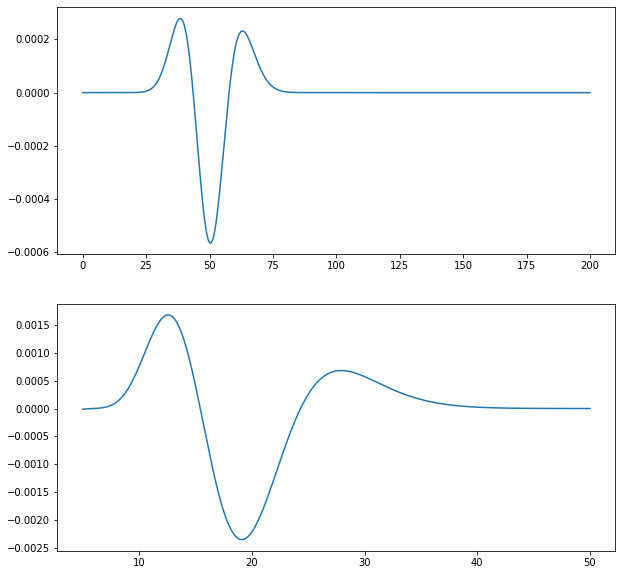

In [142]:
r_min = 1e-4
r_max = 20e1
t_min = 5e0
t_max = 50e0

r = 20e0
t = 50e0
order = 150
Npts  = 500

w0 = 1
c = 1

rr = np.linspace(r_min,r_max,Npts)
tt = np.linspace(t_min,t_max,Npts)

Fr = np.array([f(R,t,order=order) for R in rr])
Ft = np.array([f(r,T,order=order) for T in tt])

fig = plt.figure(figsize=(10,10))
axr = fig.add_subplot(211)
axt = fig.add_subplot(212)
axr.plot(rr,Fr)
axt.plot(tt,Ft)